In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from pylab import title, figure, xlabel, ylabel, xticks, bar, legend, axis, savefig
from fpdf import FPDF

import the xlsx file to do processing

In [2]:
start_time = time.time()
xls = pd.ExcelFile('CRA.xlsx')
df1 = pd.read_excel(xls, 'Consolidated_Report')
print("--- %s seconds ---" % (time.time() - start_time))

--- 89.70527935028076 seconds ---


Get all the columns data and remove the index column

In [3]:
df=df1

In [4]:
df

,EventTime,ObjectName,ObjectDescription,UserAccount,Message,NodeName,FromValue,ToValue,Path,Block,...,Sequence,Object Interacted With,UserID,UserName,UserDesignation,UserDept,User_Sub_Dept,Action Variable,Object Type,Action Class
0,07-31-2020 22:06:03,Core,NaN,APLKDOMAIN\P00116661,InteractionPar.Restart False -> True,APLK-RSHS5,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,OHM-M215_TraDir,Core,P00116661,Ashutosh Mishra,Officer I,Production,SPB - Proc,InteractionPar.Restart,Sequence,MI
1,07-31-2020 22:06:52,Pry_Condition_1,NaN,APLKDOMAIN\P00117611,Reset1 False -> True,APLK-RSHS1,False,True,[Control Structure]Root/Control Network WPB/WB...,WPB,...,DBtoMCH_Line15,Pry_Condition_1,P00117611,Shubham Singh,Officer I,Production,WPB - Proc,Reset1,Sequence,NaN
2,07-31-2020 22:06:52,Pry_Condition_1,NaN,APLKDOMAIN\P00117611,Reset1 False -> True,APLK-RSHS1,False,True,[Control Structure]Root/Control Network WPB/WB...,WPB,...,DBtoMCH_Line15,Pry_Condition_1,P00117611,Shubham Singh,Officer I,Production,WPB - Proc,Reset1,Sequence,NaN
3,07-31-2020 22:06:52,Pry_Condition_1,NaN,APLKDOMAIN\P00117611,Reset1 True -> True,APLK-RSHS1,True,True,[Control Structure]Root/Control Network WPB/WB...,WPB,...,DBtoMCH_Line15,Pry_Condition_1,P00117611,Shubham Singh,Officer I,Production,WPB - Proc,Reset1,Sequence,NaN
4,07-31-2020 22:06:54,XV1_84002,ETF_CLR_M401_PL_84001_SOLENOID_VALVE,APLKDOMAIN\P00117556,InteractionPar.ManCmd1 False -> True,APLK-RSHS4,False,True,[Control Structure]Root/Control Network WPB/WB...,WPB,...,XV1_84002,XV1_84002,P00117556,Naveen,Officer I,Plant Engineering,Mech,InteractionPar.ManCmd1,Valve,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356228,08-31-2020 22:02:41,Pry5_Condition_1,NaN,APLKDOMAIN\P00113686,Reset1 False -> True,APLK-RSHS2,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,BT_M217_TraDir_S,Pry5_Condition_1,P00113686,Neeraj Kumar Joshi,Officer I,Production,SPB - Proc,Reset1,Sequence,NaN
356229,08-31-2020 22:02:41,Pry5_Condition_1,NaN,APLKDOMAIN\P00113686,Reset1 False -> True,APLK-RSHS2,False,True,[Location Structure]Root/SPB/BATCHING TANK/BT_...,SPB,...,BT-M217-TraDir,Pry5_Condition_1,P00113686,Neeraj Kumar Joshi,Officer I,Production,SPB - Proc,Reset1,Sequence,NaN
356230,08-31-2020 22:02:44,Core,NaN,APLKDOMAIN\P00112883,InteractionPar.Restart False -> True,APKHNES2,False,True,[Control Structure]Root/Control Network WPB/WB...,WPB,...,Cellier_PGL_52,Core,P00112883,Shekhar Rakshe,Senior Officer,Plant Engineering,Mech,InteractionPar.Restart,Sequence,MI
356231,08-31-2020 22:02:45,Core,NaN,APLKDOMAIN\P00113686,InteractionPar.Restart False -> True,APLK-RSHS2,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,BT_M217_TraDir_S,Core,P00113686,Neeraj Kumar Joshi,Officer I,Production,SPB - Proc,InteractionPar.Restart,Sequence,MI


First get the no. of filters and next get each filter. For the sake of simplicity i have introduced three filters 

In [5]:
filters = 3
filter_columns = ['Change Type', 'Action Class', 'Block']

Get the filter values of each column

In [6]:
for i in filter_columns:
    print('------------', i)
    print(list(set(df[i])))

------------ Change Type
['Control Action', 'Graphic Action', 'Web System Workplace', '[Object Type Structure']
------------ Action Class
[nan, 'MI']
------------ Block
[nan, 'WPB', 'Utility', 'RB', 'EQUIPMENT', 'SPB', 'PEL_System', 'test-wpb', 'Control System', 'EB']


In [7]:
FV = ['Control Action','MI', ['RB', 'EB',  'WPB','SPB']]

Filtering operation

In [8]:
data=df
print(len(data))
data_final=[]
for i in range(len(FV)):
    if i==2:
        for j in FV[i]:
            is_filt = data[filter_columns[i]] == j
            data_f = data[is_filt]
            data_final.append(data_f)
            print(j,len(data_f))
        break
    is_filt = data[filter_columns[i]] == FV[i]
    data = data[is_filt]
    print(len(data))

356233
260933
95199
RB 14141
EB 10688
WPB 42715
SPB 27653


In [9]:
data_final[3].head()

,EventTime,ObjectName,ObjectDescription,UserAccount,Message,NodeName,FromValue,ToValue,Path,Block,...,Sequence,Object Interacted With,UserID,UserName,UserDesignation,UserDept,User_Sub_Dept,Action Variable,Object Type,Action Class
0,07-31-2020 22:06:03,Core,NaN,APLKDOMAIN\P00116661,InteractionPar.Restart False -> True,APLK-RSHS5,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,OHM-M215_TraDir,Core,P00116661,Ashutosh Mishra,Officer I,Production,SPB - Proc,InteractionPar.Restart,Sequence,MI
9,07-31-2020 22:07:01,Core,NaN,APLKDOMAIN\P00116661,InteractionPar.Restart False -> True,APLK-RSHS5,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,OHM-M211_TraDir,Core,P00116661,Ashutosh Mishra,Officer I,Production,SPB - Proc,InteractionPar.Restart,Sequence,MI
25,07-31-2020 22:12:15,Core,NaN,APLKDOMAIN\P00113473,StartHSI False -> True,APLK-RSHS4,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,MIX_M203_Mixing,Core,P00113473,Vikas Nalawade,Officer I,Production,SPB - Proc,StartHSI,Sequence,MI
53,07-31-2020 22:16:24,Core,NaN,APLKDOMAIN\P00116522,InteractionPar.Restart False -> True,APLK-RSHS1,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,KPGL_864038,Core,P00116522,Krishnat Shingare,Officer I,Production,SPB - Packing,InteractionPar.Restart,Sequence,MI
140,07-31-2020 22:18:50,Core,NaN,APLKDOMAIN\P00116661,InteractionPar.Restart False -> True,APLK-RSHS5,False,True,[Control Structure]Root/Control Network SPB/SP...,SPB,...,TSD_M205_TraDir,Core,P00116661,Ashutosh Mishra,Officer I,Production,SPB - Proc,InteractionPar.Restart,Sequence,MI


Get the column name for which the count has to be found

In [10]:
Column_name_pivot = 'Equipment Group'

In [11]:
l_O_C_F = []
for i in data_final:
    l_O_C = list(i[Column_name_pivot])
    l_O_C_F.append(l_O_C)

Counting of the unique elements in the list

In [12]:
Result_F = []
for j in l_O_C_F:
    Result = dict()
    for i in j:
        Result[i] = Result.get(i, 0) + 1
    Result_F.append(Result)

Sorting dictionary

In [13]:
sorted_F=[]
for i in Result_F:
    print('+++____++++_____+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    sorted_keys = sorted(i, key=i.get, reverse=True)
    sorted_Result=dict()
    for w in sorted_keys:
        sorted_Result[w] = i[w]
    for i,j in sorted_Result.items():
        print(i,'----' ,j)
    sorted_F.append(sorted_Result)

+++____++++_____+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ReaTraDir ---- 4184
ASTTraDir ---- 1414
ST-M4301 ---- 1059
BLTraDir ---- 1039
FltrTraDir ---- 888
XCTTraDir ---- 818
SepTraDir ---- 765
PGL_29 ---- 765
VesTraDir ---- 596
BTTraDir ---- 460
COOLING_TOWER ---- 398
RB_Pigging ---- 326
Tank_Farms ---- 300
ST_M4008_M4009 ---- 243
SOLVENT_TF ---- 209
DEXTRIN ---- 162
SCRTraDir ---- 153
DPVTraDir ---- 85
POTABLE_WATER ---- 78
PSTTraDir ---- 63
Program1 ---- 41
RefluxVesTraDir ---- 32
Control Network RB ---- 29
Utility ---- 23
TFS_SYSTEM ---- 10
Application_1 ---- 1
+++____++++_____+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Pigging ---- 2682
LDVTraDir ---- 853
PETTraDir ---- 641
ReaTraDir ---- 577
VesTraDir ---- 573
ST_M4203 ---- 563
ST_M4214 ---- 516
BTTraDir ---- 450
ST_M4204 ---- 381
ST_M4209 ---- 350
TankFarm ---- 328
Charge Powder ---- 304
ReaTempCntrl ---- 267
PHVTraDir ---- 166
R_5635 ---- 166
DayTanks

In [17]:
sorted_F[3]

{'VES': 4354,
 'MIXER_PM_CPGL': 3196,
 'TSD': 2334,
 'AMC_OHM': 2228,
 'OHM': 1522,
 'Line18_21': 1487,
 'MIXER': 1399,
 'MIXER_PM_KPGL': 1223,
 'AMC_TSD_BT': 1166,
 'PACK_MACHINE': 1159,
 'BASKET_MILL': 1150,
 'OHM_TO_MIXER_PGL': 976,
 'KSL_14_17': 745,
 'BT_MIXER_PGL': 675,
 'Utility_Area': 477,
 'KSL_PGL_8_11': 421,
 'AMC_MIXER': 325,
 'AMC_MISC': 306,
 'RESIN_STF': 270,
 'BT_MIXER': 262,
 'SPB_MIsc': 254,
 'TINTER': 225,
 'WST': 174,
 'PREBATCHING_BT': 165,
 'Hopper': 161,
 'DPV_MMS': 100,
 'BT': 100,
 'OHM_TO_MIX_KPGL': 99,
 'STAF': 98,
 'PIGMENT_FIBC': 96,
 'BARREL_GODOWN': 94,
 'SATF_Pump_MMS': 89,
 'TSD_OHM_KPGL': 63,
 'SPB_Scrubber': 59,
 'DT_CPGL': 53,
 'Misc': 42,
 'AZO': 29,
 'METLER_WT': 26,
 'VES_M213': 20,
 'MMS': 11,
 'MISC': 10,
 'SPB_App_2_2': 3,
 'Control Network SPB': 3,
 'AMC_Scrubber': 2,
 'Vortex_FT': 1,
 'UTILITY': 1}

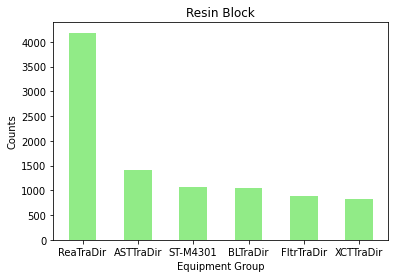

In [18]:
i=6
title("Resin Block")
xlabel('Equipment Group')
ylabel('Counts')
plt.bar(list(sorted_F[0].keys())[0:i], list(sorted_F[0].values())[0:i], width=0.5, color="#91eb87")
savefig('Resin_chart.png')

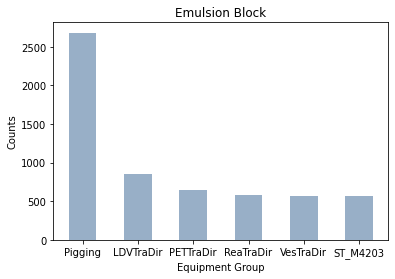

In [19]:
i=6
title("Emulsion Block")
xlabel('Equipment Group')
ylabel('Counts')
plt.bar(list(sorted_F[1].keys())[0:i], list(sorted_F[1].values())[0:i], width=0.5, color="#98AFC7")
savefig('Emulsion_chart.png')

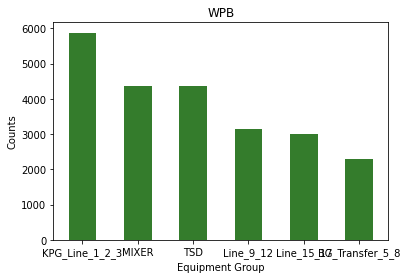

In [20]:
i=6
title("WPB")
xlabel('Equipment Group')
ylabel('Counts')
plt.bar(list(sorted_F[2].keys())[0:i], list(sorted_F[2].values())[0:i], width=0.5, color="#347C2C")
savefig('WPB_Chart.png')

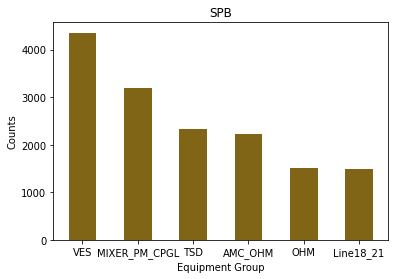

In [21]:
i=6
title("SPB")
xlabel('Equipment Group')
ylabel('Counts')
plt.bar(list(sorted_F[3].keys())[0:i], list(sorted_F[3].values())[0:i], width=0.5, color="#806517")
savefig('SPB_chart.png')

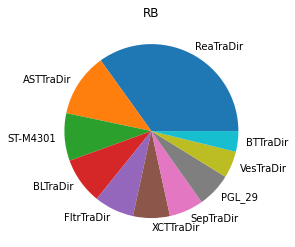

In [75]:
i=10
plt.title('RB')
plt.pie(list(sorted_F[0].values())[0:i], labels = list(sorted_F[0].keys())[0:i]) 
savefig('RB_pie_chart.png')

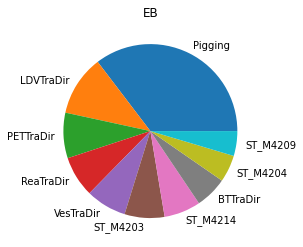

In [71]:
i=10
plt.pie(list(sorted_F[1].values())[0:i], labels = list(sorted_F[1].keys())[0:i]) 
plt.title('EB')
savefig('EB_pie_chart.png')

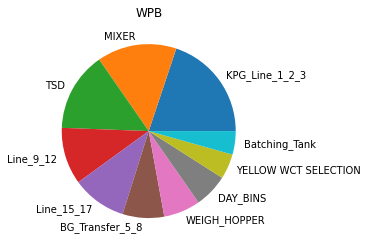

In [72]:
i=10
plt.pie(list(sorted_F[2].values())[0:i], labels = list(sorted_F[2].keys())[0:i]) 
plt.title('WPB')
savefig('WPB_pie_chart.png')

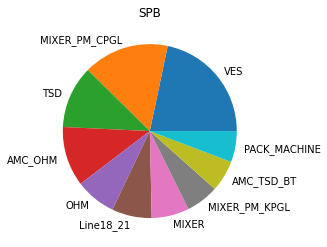

In [73]:
i=10
plt.pie(list(sorted_F[3].values())[0:i], labels = list(sorted_F[3].keys())[0:i]) 
plt.title('SPB')
savefig('SPB_pie_chart.png')

In [77]:
pdf = FPDF()
pdf.add_page()
pdf.set_xy(0, 0)
pdf.set_font('arial', 'B', 12)
pdf.cell(60)
pdf.cell(75, 10, "Resin Manual Intervention data", 0, 2, 'C')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(-40)
pdf.cell(40, 10, 'S.No', 1, 0, 'C')
pdf.cell(50, 10, 'Equipment', 1, 0, 'C')
pdf.cell(40, 10, 'Counts', 1, 2, 'C')
pdf.cell(-90)
pdf.set_font('arial', '', 10)
keyss= list(sorted_F[0].keys())
values = list(sorted_F[0].values())
for i in range(0, len(sorted_F[0])):
    pdf.cell(40, 8, '%s' % (str(i)), 1, 0, 'C')
    pdf.cell(50, 8, '%s' % (str(keyss[i])), 1, 0, 'C')
    pdf.cell(40, 8, '%s' % (str(values[i])), 1, 2, 'C')
    pdf.cell(-90)
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('Resin_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('RB_pie_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')

pdf.add_page()
pdf.set_xy(0, 0)
pdf.set_font('arial', 'B', 12)
pdf.cell(60)
pdf.cell(75, 10, "Emulsion Manual Intervention data", 0, 2, 'C')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(-40)
pdf.cell(40, 10, 'S.No', 1, 0, 'C')
pdf.cell(50, 10, 'Equipment', 1, 0, 'C')
pdf.cell(40, 10, 'Counts', 1, 2, 'C')
pdf.cell(-90)
pdf.set_font('arial', '', 10)
keyss= list(sorted_F[1].keys())
values = list(sorted_F[1].values())
for i in range(0, len(sorted_F[1])):
    pdf.cell(40, 8, '%s' % (str(i)), 1, 0, 'C')
    pdf.cell(50, 8, '%s' % (str(keyss[i])), 1, 0, 'C')
    pdf.cell(40, 8, '%s' % (str(values[i])), 1, 2, 'C')
    pdf.cell(-90)
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('Emulsion_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('EB_pie_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')

pdf.add_page()
pdf.set_xy(0, 0)
pdf.set_font('arial', 'B', 12)
pdf.cell(60)
pdf.cell(75, 10, "WPB Manual Intervention data", 0, 2, 'C')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(-40)
pdf.cell(40, 10, 'S.No', 1, 0, 'C')
pdf.cell(50, 10, 'Equipment', 1, 0, 'C')
pdf.cell(40, 10, 'Counts', 1, 2, 'C')
pdf.cell(-90)
pdf.set_font('arial', '', 10)
keyss= list(sorted_F[2].keys())
values = list(sorted_F[2].values())
for i in range(0, len(sorted_F[2])):
    pdf.cell(40, 8, '%s' % (str(i)), 1, 0, 'C')
    pdf.cell(50, 8, '%s' % (str(keyss[i])), 1, 0, 'C')
    pdf.cell(40, 8, '%s' % (str(values[i])), 1, 2, 'C')
    pdf.cell(-90)
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('WPB_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('WPB_pie_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')

pdf.add_page()
pdf.set_xy(0, 0)
pdf.set_font('arial', 'B', 12)
pdf.cell(60)
pdf.cell(75, 10, "Emulsion Manual Intervention data", 0, 2, 'C')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.cell(-40)
pdf.cell(40, 10, 'S.No', 1, 0, 'C')
pdf.cell(50, 10, 'Equipment', 1, 0, 'C')
pdf.cell(40, 10, 'Counts', 1, 2, 'C')
pdf.cell(-90)
pdf.set_font('arial', '', 10)
keyss= list(sorted_F[3].keys())
values = list(sorted_F[3].values())
for i in range(0, len(sorted_F[3])):
    pdf.cell(40, 8, '%s' % (str(i)), 1, 0, 'C')
    pdf.cell(50, 8, '%s' % (str(keyss[i])), 1, 0, 'C')
    pdf.cell(40, 8, '%s' % (str(values[i])), 1, 2, 'C')
    pdf.cell(-90)
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('SPB_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
pdf.cell(90, 10, " ", 0, 2, 'C')
pdf.image('SPB_pie_chart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')

pdf.output('test.pdf', 'F')

''